In [33]:
import numpy as np

# Preprocessing

In [10]:
data_read = []
with open('yearpredictionmsd/YearPredictionMSD.txt', 'r') as file:
    lines = file.readlines()
data_read = [line.strip().split(",") for line in lines]

In [15]:
# Validate that feature matches the specs
print("Total number of instance ", len(data_read))
print("Total number of features ", len(data_read[0][1:]))

Total number of instance  515345
Total number of features  90


### Checking for any missing attributes -> each instance should have 91 columns, index 0 matches year, index 1-90 matches features.

In [20]:
anomalies = []
for index, instance in enumerate(data_read):
    if (len(instance) != 91):
        anomalies.append(index)
print("No Anomalies detected: ", len(anomalies) == 0)

No Anomalies detected:  True


### Breakdown data into training and testing, first 463,715 to be training via data set instructions. Separate year with features, converting types.

In [34]:
training = np.array(data_read[:463715])
testing = np.array(data_read[463715:])

In [29]:
print(f"length of training {len(training)}, length of testing {len(testing)}, total {len(data_read)}")

length of training 463715, length of testing 51630, total 515345


In [54]:
def data_cleaning(data):
    years = data[:, 0]
    years = [int(year) for year in years]
    features = data[:, 1:]
    features = [np.double(feature) for feature in features]
    return np.array(years), np.array(features)


In [55]:
training_year, training_features = data_cleaning(training)
testing_year, testing_features = data_cleaning(testing)

### For Training Data, first normalize the attributes. 12 average timbre features / 78 timbre covariance features. Normalize each set first, then combine.

In [58]:
from sklearn.preprocessing import StandardScaler
training_avg = training_features[:,:12]
training_cov = training_features[:,12:]


training_scale_avg = StandardScaler()
training_scale_cov = StandardScaler()

training_avg_norm = training_scale_avg.fit_transform(training_avg)
training_cov_norm = training_scale_cov.fit_transform(training_cov)
training_features_norm = np.hstack((training_avg_norm, training_cov_norm))
print("Normalized feature shape: ", training_features_norm.shape)

Normalized feature shape:  (463715, 90)


# Data Analysis

In [64]:
import pandas as pd

training_features_columns = [f"timbre_feature_{i}" for i in range(training_features_norm.shape[1])]
training_df = pd.DataFrame(training_features_norm, columns=training_features_columns)
training_df['year'] = training_year
training_df.head()

,timbre_feature_0,timbre_feature_1,timbre_feature_2,timbre_feature_3,timbre_feature_4,timbre_feature_5,timbre_feature_6,timbre_feature_7,timbre_feature_8,timbre_feature_9,...,timbre_feature_81,timbre_feature_82,timbre_feature_83,timbre_feature_84,timbre_feature_85,timbre_feature_86,timbre_feature_87,timbre_feature_88,timbre_feature_89,year
0,1.078786,0.391566,1.826962,0.466361,-0.476621,-0.275266,-1.551924,-1.311105,0.389093,-0.665402,...,0.106413,0.144257,-0.236180,0.047430,-0.355855,0.544084,-0.470477,-0.255366,0.042637,2001
1,0.879511,0.332631,1.748961,0.723345,-0.166769,-1.189729,0.764797,0.109714,1.422683,0.416934,...,0.304413,-0.068758,0.053729,-0.634467,-0.435794,0.556059,0.570861,0.209341,1.161118,2001
2,1.245515,0.592771,1.337550,0.752153,-0.002899,-0.699856,-0.061323,-0.069912,1.167910,-0.073176,...,0.565220,-0.758259,-0.282931,-0.026058,0.223918,-0.508889,-0.338081,0.107828,-0.090122,2001
3,0.799787,-0.061214,0.784000,0.089197,0.327463,-1.297159,0.509977,-1.073557,-0.015553,-1.262565,...,-0.562444,-0.479423,-0.890199,-0.796124,0.568335,-0.262505,0.409924,0.973205,0.795200,2001
4,1.247663,0.793377,1.657449,0.449177,-0.408652,-0.564673,-0.692545,-0.952369,0.843389,-0.143557,...,0.097564,0.192974,-0.585048,-0.113758,-0.219524,0.448546,0.258400,0.194381,1.244057,2001


### Plot a heatmap of feature correlation matrix to see which features are correlated with another. Also plot to see if there is a strong single feature correlated with the year.

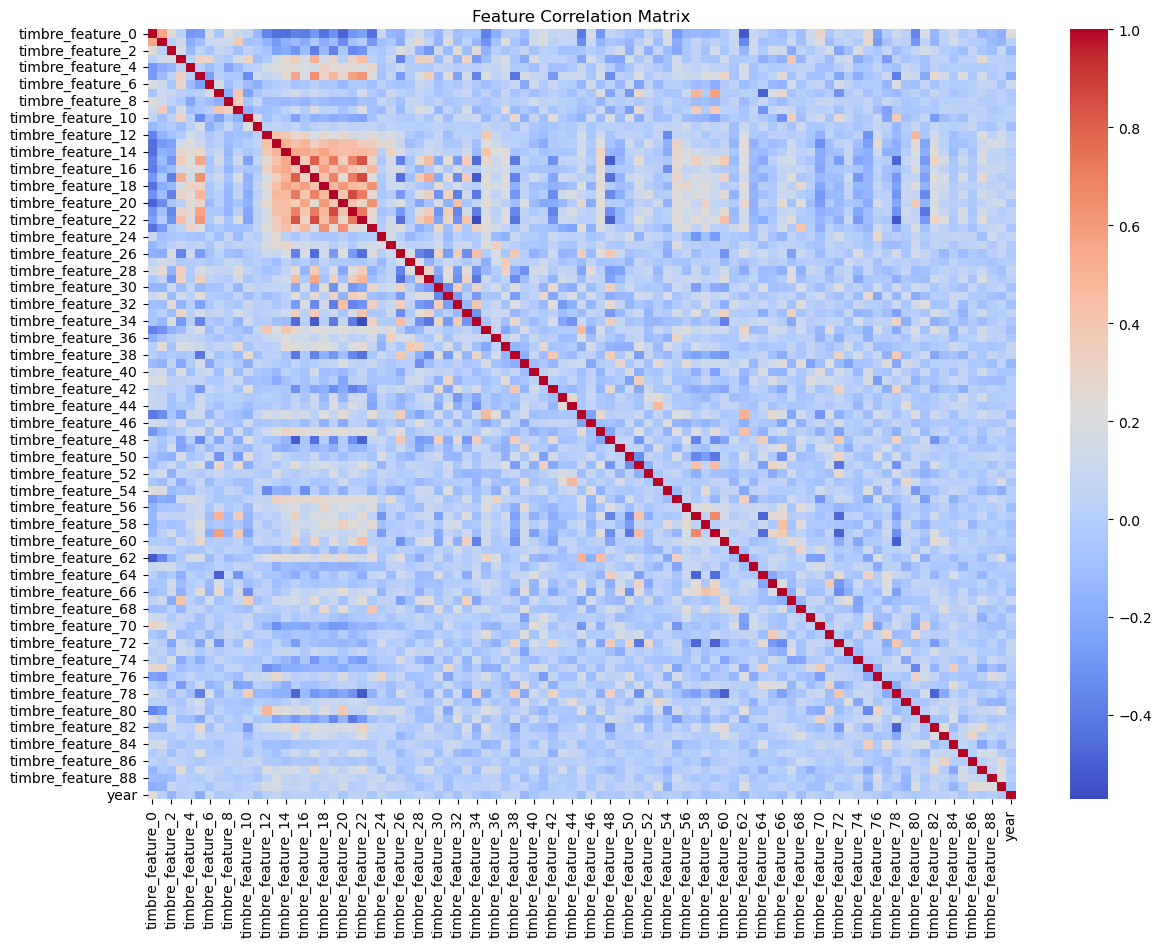

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (features + year)
corr_matrix = training_df.corr()

# Heatmap of correlation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()